In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
with open('groceries.csv') as f:
    df=f.read()

In [3]:
import matplotlib.pyplot as plt

In [5]:
df = df.split("\n")
df_list = []
for i in df:
    df_list.append(i.split(","))

In [6]:
all_groceries_list = [i for item in df_list for i in item]

In [7]:
from collections import Counter

In [8]:
item_frequencies = Counter(all_groceries_list)

In [9]:
#Sorting acc to frequencies

In [10]:
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [11]:
# Storing frequencies and items in separate variables

In [12]:
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

Text(0, 0.5, 'Count')

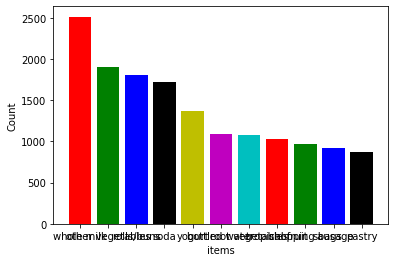

In [15]:
plt.bar(height = frequencies[0:11],x = list(range(0,11)),color='rgbkymc');
plt.xticks(list(range(0,11),),items[0:11]);
plt.xlabel("items")
plt.ylabel("Count")

In [18]:
from mlxtend.frequent_patterns import apriori,association_rules

In [19]:
groceries_series  = pd.DataFrame(pd.Series(df_list))
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction

In [20]:
groceries_series.columns

RangeIndex(start=0, stop=1, step=1)

In [21]:
groceries_series.columns = ["transactions"]

In [22]:
X = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

In [23]:
X.shape

(9835, 169)

In [42]:
frequent_itemsets = apriori(X, min_support=0.005, max_len=4,use_colnames = True)

In [43]:
# Most Frequent item sets based on support 

In [44]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

Text(0, 0.5, 'support')

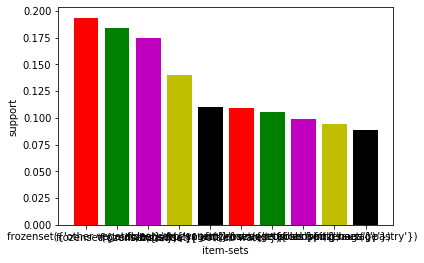

In [45]:
plt.bar(x= list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');
plt.ylabel('support')

In [46]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [47]:
from pandas.io.common import is_url

In [48]:
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


In [49]:
rules.sort_values('lift',ascending = False,inplace=True)

In [50]:
def to_list(i):
    return (sorted(list(i)))

In [51]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [52]:
ma_X = ma_X.apply(sorted)

In [53]:
ma_X

2170    [root vegetables, tropical fruit, whole milk, ...
2171    [root vegetables, tropical fruit, whole milk, ...
2168    [root vegetables, tropical fruit, whole milk, ...
2173    [root vegetables, tropical fruit, whole milk, ...
2378    [other vegetables, pip fruit, root vegetables,...
                              ...                        
461                        [bottled water, shopping bags]
277                               [pip fruit, rolls/buns]
276                               [pip fruit, rolls/buns]
2317                    [rolls/buns, specialty chocolate]
2316                    [rolls/buns, specialty chocolate]
Length: 2868, dtype: object

In [54]:
rules_sets = list(ma_X)

In [55]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [56]:
index_rules=[]

In [57]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [58]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [59]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2170,"(tropical fruit, whole milk)","(root vegetables, yogurt)",0.042298,0.025826,0.005694,0.134615,5.212371,0.004602,1.125712
2378,"(pip fruit, root vegetables)","(other vegetables, whole milk)",0.015557,0.074835,0.005491,0.352941,4.716272,0.004326,1.429801
2795,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
1358,"(tropical fruit, root vegetables)","(other vegetables, whole milk)",0.021047,0.074835,0.007016,0.333333,4.454257,0.005441,1.387748
2740,"(fruit/vegetable juice, whole milk)","(other vegetables, yogurt)",0.026640,0.043416,0.005084,0.190840,4.395570,0.003927,1.182193
2070,"(citrus fruit, root vegetables)","(other vegetables, whole milk)",0.017692,0.074835,0.005796,0.327586,4.377460,0.004472,1.375887
1166,"(tropical fruit, whole milk)","(other vegetables, yogurt)",0.042298,0.043416,0.007626,0.180288,4.152546,0.005789,1.166976
2674,"(whipped/sour cream, root vegetables)","(other vegetables, whole milk)",0.017082,0.074835,0.005186,0.303571,4.056556,0.003907,1.328442
1091,"(other vegetables, whole milk)","(root vegetables, yogurt)",0.074835,0.025826,0.007829,0.104620,4.050919,0.005896,1.088000
2063,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171


In [62]:
#Movies

In [63]:
df=pd.read_csv('my_movies.csv')

In [64]:
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [65]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

In [66]:
df1=df.iloc[:,5:]

In [67]:
df1.columns

Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')

In [80]:
frequent_itemsets = apriori(df1, min_support=0.005, max_len=3,use_colnames = True)

In [81]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

Text(0, 0.5, 'support')

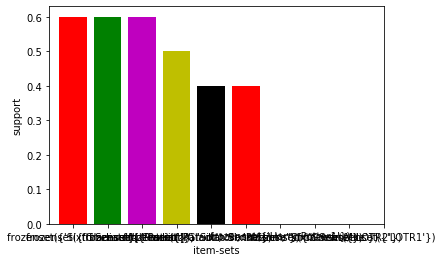

In [82]:
plt.bar(x = list(range(1,7)),height = frequent_itemsets.support[1:7],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')

In [83]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)

In [84]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)


ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

In [85]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []

In [86]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [87]:
rules_no_redudancy  = rules.iloc[index_rules,:]

In [88]:
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
81,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
91,(LOTR2),"(Green Mile, LOTR1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
115,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.5,5.0,0.08,1.8
53,(LOTR1),"(Green Mile, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
20,(Harry Potter1),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
72,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
69,(Green Mile),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
96,(Green Mile),"(LOTR, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
36,(Harry Potter1),"(LOTR1, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
45,(Green Mile),"(LOTR1, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


In [89]:
#Books

In [90]:
df=pd.read_csv('book.csv')

In [91]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [92]:
frequent_itemsets = apriori(df, min_support=0.005, max_len=3,use_colnames = True)

In [93]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

Text(0, 0.5, 'support')

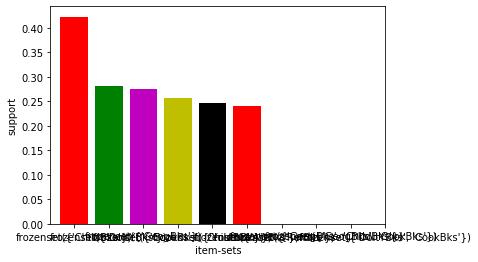

In [94]:
plt.bar(x = list(range(1,7)),height = frequent_itemsets.support[1:7],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')

In [95]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)

In [96]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)


ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

In [97]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []

In [98]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [99]:
rules_no_redudancy  = rules.iloc[index_rules,:]

In [100]:
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
750,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
742,"(ArtBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
350,"(ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
561,"(ItalCook, RefBks)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
921,"(ItalAtlas, GeogBks)",(ItalArt),0.0205,0.0485,0.0115,0.560976,11.566507,0.010506,2.167306
896,"(ItalCook, ItalAtlas)",(ItalArt),0.0230,0.0485,0.0125,0.543478,11.205737,0.011385,2.084238
966,(ItalArt),"(ItalCook, Florence)",0.0485,0.0175,0.0095,0.195876,11.192931,0.008651,1.221827
812,"(ItalArt, ChildBks)",(ItalAtlas),0.0360,0.0370,0.0145,0.402778,10.885886,0.013168,1.612465
973,(ItalArt),"(ItalAtlas, DoItYBks)",0.0485,0.0190,0.0095,0.195876,10.309278,0.008578,1.219962
1009,(ItalArt),"(ItalAtlas, YouthBks)",0.0485,0.0175,0.0085,0.175258,10.014728,0.007651,1.191281
